In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import datetime
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use('default') # dark_background
pd.set_option("display.max_columns", 1000) 
pd.set_option("display.max_colwidth", 1000)
# pd.reset_option('max_columns')
# pd.reset_option('max_colwidth')

In [2]:
df = pd.read_csv('../../data/processed/df_final_3.csv')
# df = pd.read_csv('../../data/processed/data_final.csv', index_col=[0])
# df.drop('distribuidora_y', axis=1, inplace=True)
# df.rename(columns={'distribuidora_x':'distribuidora'}, inplace=True)
df

,estacao,cidade,datetime,distribuidora,carga,temp_mean,ano,mes,dia,hora,1,2,3,4,5,6,7,8,9,10,11,12,Ariranha,Avare,Barra Bonita,Barra do Turvo,Barretos,Barueri,Bauru,Bebedouro,Bertioga,Bragança Paulista,Cachoeira Paulista,Campos do Jordão,Casa Branca,Dracena,Franca,Ibitinga,Iguape,Itapeva,Itapira,Ituverava,Jales,Jose Bonifácio,Lins,Marília,Ourinhos,Piracicaba,Pradopolis,Presidente Prudente,Rancharia,Registro,Sorocaba,São Carlos,São Luis do Paraitinga,São Miguel Arcanjo,São Paulo - Mirante de Santana,São Paulo-SESC Interlagos,São Sebastião,São Simão (SP),Taubaté,Tupã,Valparaiso,Votuporanga,cluster,hora_0,hora_1,hora_2,hora_3,hora_4,hora_5,hora_6,hora_7,hora_8,hora_9,hora_10,hora_11,hora_12,hora_13,hora_14,hora_15,hora_16,hora_17,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23,cluster_0,cluster_1,cluster_2,cluster_3
0,A701,São Paulo - Mirante de Santana,2018-01-01 00:00:00,ELETROPAULO,3691.689941,21.133333,2018,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,A705,Bauru,2018-01-01 00:00:00,CPFL PAULISTA,2569.709961,21.366667,2018,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,A706,Campos do Jordão,2018-01-01 00:00:00,ELEKTRO,1715.364014,15.366667,2018,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,A707,Presidente Prudente,2018-01-01 00:00:00,ENERGISA SSE-SP,368.049011,22.866667,2018,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,A708,Franca,2018-01-01 00:00:00,CPFL PAULISTA,2569.709961,19.700000,2018,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533041,A755,Barueri,2022-03-31 23:00:00,ELETROPAULO,4829.259766,17.000000,2022,3,31,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1533042,A763,Marília,2022-03-31 23:00:00,CPFL PAULISTA,3982.825928,17.933333,2022,3,31,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1533043,A764,Bebedouro,2022-03-31 23:00:00,CPFL PAULISTA,3982.825928,20.300000,2022,3,31,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1533044,A770,São Simão (SP),2022-03-31 23:00:00,CPFL PAULISTA,3982.825928,20.566667,2022,3,31,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [6]:
X = df[['temp_mean']]
Y = df[['carga']]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [8]:
X_test

,temp_mean
403520,15.600000
621773,18.066667
1407823,29.433333
1119303,24.228087
1322706,21.638852
...,...
724067,18.133333
1085367,24.380857
638290,19.966667
489273,18.166667


In [12]:
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
df_train = pd.concat([X_train_mm, Y_train.reset_index().drop('index', axis=1)], axis=1)
df_test = pd.concat([X_test_mm, Y_test.reset_index().drop('index', axis=1)], axis=1)

In [13]:
display(f'Train: {df_train.shape}', df_train.head(), f'Test: {df_test.shape}', df_test.head())

'Train: (1073132, 2)'

,temp_mean,carga
0,0.475930,2868.922119
1,0.518175,400.938995
2,0.516697,331.006988
3,0.574407,3746.742920
4,0.625449,3426.216064


'Test: (459914, 2)'

,temp_mean,carga
0,0.414091,2253.839111
1,0.467290,3557.229980
2,0.712437,471.221008
3,0.600174,3607.837891
4,0.544332,3390.349121


In [14]:
# df_train.to_csv(f'../../data/processed/data_train.csv', index=False)
# df_test.to_csv(f'../../data/processed/data_test.csv', index=False)

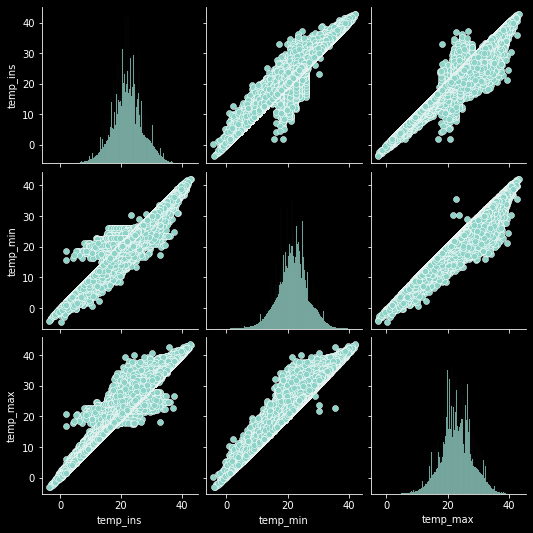

In [10]:
sns.pairplot(X)

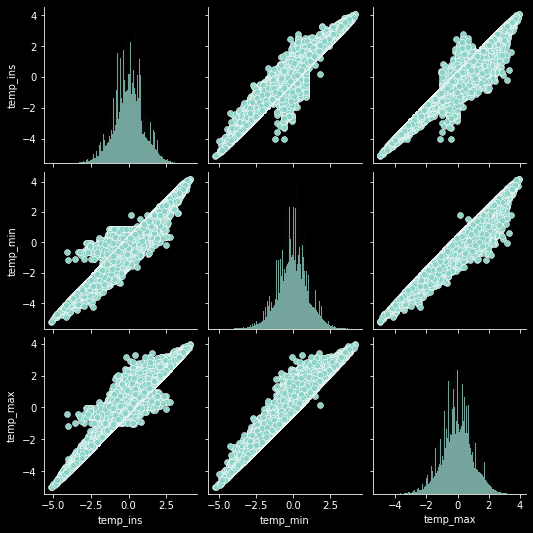

In [11]:
sns.pairplot(X_train_ss)

In [19]:
X

,temp_ins,temp_min,temp_max
0,21.1,21.0,21.3
1,21.2,21.2,21.7
2,15.4,15.2,15.5
3,22.7,22.7,23.2
4,19.5,19.5,20.1
...,...,...,...
1533041,17.0,16.9,17.1
1533042,17.8,17.8,18.2
1533043,20.0,20.0,20.9
1533044,20.4,20.3,21.0


<AxesSubplot:ylabel='carga_cidade'>

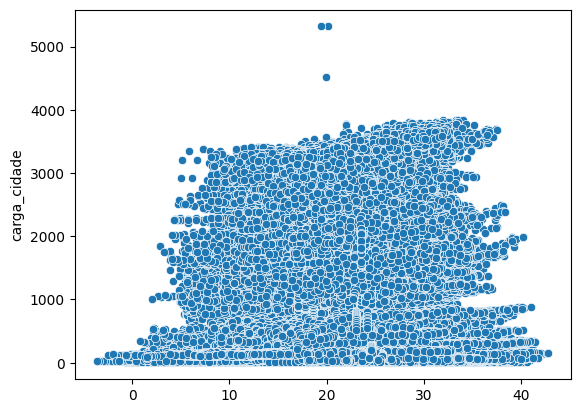

In [24]:
sns.scatterplot(x=X.mean(axis=1), y=Y)

In [29]:
pd.concat([X,Y], axis=1, ignore_index=True)

,0,1,2,3
0,21.1,21.0,21.3,1759.886898
1,21.2,21.2,21.7,357.028573
2,15.4,15.2,15.5,109.621475
3,22.7,22.7,23.2,159.956114
4,19.5,19.5,20.1,270.049560
...,...,...,...,...
1533041,17.0,16.9,17.1,224.890969
1533042,17.8,17.8,18.2,327.515227
1533043,20.0,20.0,20.9,134.230098
1533044,20.4,20.3,21.0,20.983141


In [36]:
Y_dist = df['carga']

<AxesSubplot:>

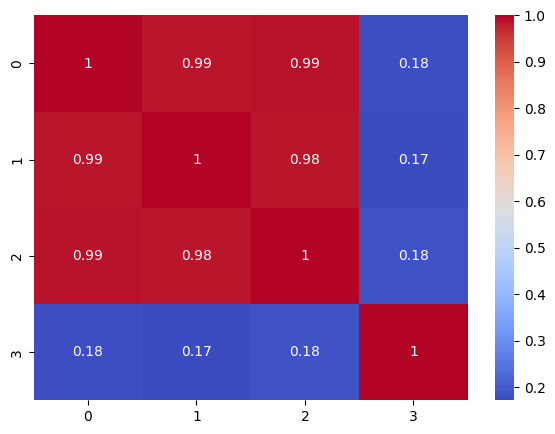

In [37]:
plt.figure(figsize=(7,5))
sns.heatmap(pd.concat([X,Y_dist], axis=1, ignore_index=True).corr(), annot=True, cmap='coolwarm')
